In [1]:
from data_processor import DataProcessor
import numpy as np
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [2]:
def evaluate(model, x_valid, y_valid):
    error = mean_squared_error(y_valid.ravel(), model.predict(x_valid))
    var = np.var(y_valid.ravel())
    print("The MSE error is: ", error)
    print("The variance of the validation set is: ", var)
    r_2 = 1 - error / var

    print("The model explians" ,r_2 ," of the variance in data")

In [3]:
file_1 = "../data/Train.csv"
file_2 = "../data/additional_data/trainRoot_edited.csv"

processor = DataProcessor(file_1, file_2, test = False, minimal = True)
x_train, x_valid, y_train, y_valid = processor.get_numpy_data(fillna = True, additional = True,
                                                                            encode = True, np_split = True, enocde_user = False,
                                                                            normalize = True, drop_ones = True)

In [4]:
param_dist = {'objective':'reg:squarederror', 'n_estimators':100, 'max_depth':1}
bst = xgb.XGBModel(**param_dist)
bst.fit(x_train, y_train.ravel(), eval_set=[(x_valid, y_valid)], verbose = True)
preds = bst.predict(x_valid)

[0]	validation_0-rmse:1712.12
[1]	validation_0-rmse:1582.38
[2]	validation_0-rmse:1468.6
[3]	validation_0-rmse:1367.91
[4]	validation_0-rmse:1281.37
[5]	validation_0-rmse:1205.46
[6]	validation_0-rmse:1139.95
[7]	validation_0-rmse:1083.76
[8]	validation_0-rmse:1035.37
[9]	validation_0-rmse:994.502
[10]	validation_0-rmse:959.269
[11]	validation_0-rmse:929.664
[12]	validation_0-rmse:904.862
[13]	validation_0-rmse:883.579
[14]	validation_0-rmse:865.757
[15]	validation_0-rmse:850.967
[16]	validation_0-rmse:838.214
[17]	validation_0-rmse:827.861
[18]	validation_0-rmse:818.651
[19]	validation_0-rmse:811.074
[20]	validation_0-rmse:805.07
[21]	validation_0-rmse:799.516
[22]	validation_0-rmse:795.261
[23]	validation_0-rmse:791.309
[24]	validation_0-rmse:787.932
[25]	validation_0-rmse:785.336
[26]	validation_0-rmse:783.178
[27]	validation_0-rmse:781.053
[28]	validation_0-rmse:779.326
[29]	validation_0-rmse:778.003
[30]	validation_0-rmse:776.625
[31]	validation_0-rmse:775.737
[32]	validation_0-rm

In [5]:
evaluate(bst, x_valid, y_valid)

The MSE error is:  587021.695699
The variance of the validation set is:  905135.302398
The model explians 0.351454203429  of the variance in data


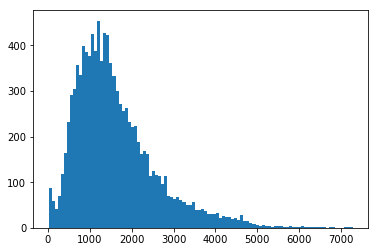

In [6]:
plt.hist(y_train, bins = 100)
plt.show()